# Clustering the Countries by using K-Means Clustering

## About Dataset  
#### Objective:  
- To categorise the countries using socio-economic and health factors that determine the overall development of the country.  
#### About organization:  
- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.  
#### Problem Statement:  
- HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  

#### Data Explorer:
1. Country-data.csv
2. data-dictionary.csv

##### About this file:
- The main dataset containing 167 rows and 10 columns
- 10 colums: 
    + country: Name of the country
    + child_mort: Death of children under 5 years of age per 1000 live births
    + exports: Exports of goods and services per capita. Given as %age of the GDP per capita
    + health: Total health spending per capita. Given as %age of GDP per capita
    + imports: Imports of goods and services per capita. Given as %age of the GDP per capita
    + Income: Net income per person
    + Inflation: The measurement of the annual growth rate of the Total GDP
    + life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
    + total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
    + gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv(r'E:\PYTHON\dataset\Country-data.csv')

# Hiển thị thông tin tổng quan về dữ liệu
print(df.info())
print(df.describe())
print(df.head())

# Xử lý dữ liệu
X = df.drop('country', axis=1)  # Bỏ cột country vì nó không phải là một đặc trưng để clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.

In [2]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

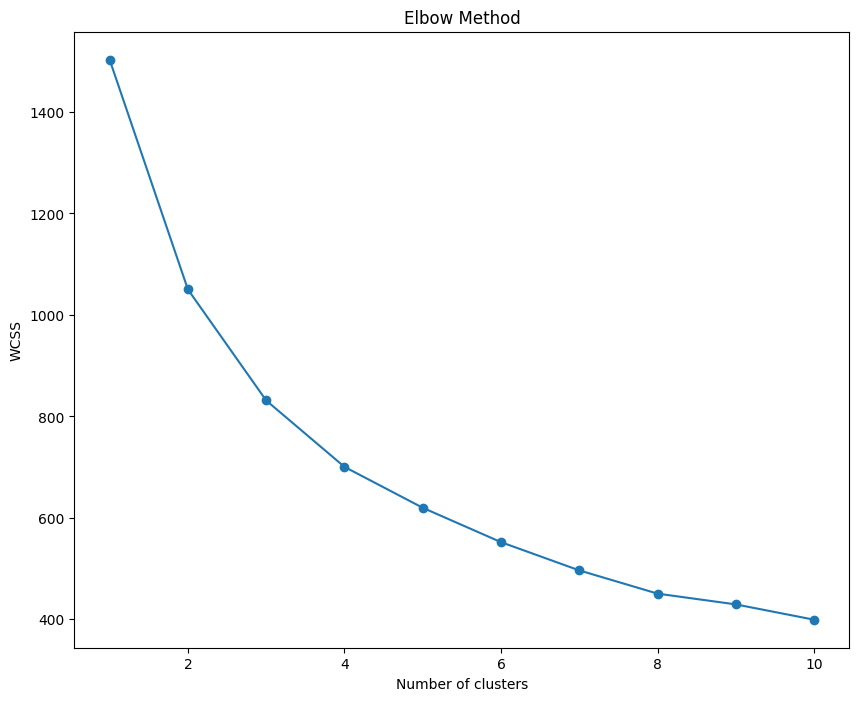

In [3]:
# Tìm số lượng cụm tối ưu bằng phương pháp elbow
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
# Áp dụng KMeans với số lượng cụm là 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Thêm nhãn cụm vào DataFrame gốc
df['Cluster'] = clusters

# Hiển thị các quốc gia và cụm tương ứng
print(df[['country', 'Cluster']].head(10))

               country  Cluster
0          Afghanistan        1
1              Albania        0
2              Algeria        0
3               Angola        1
4  Antigua and Barbuda        0
5            Argentina        0
6              Armenia        0
7            Australia        2
8              Austria        2
9           Azerbaijan        0


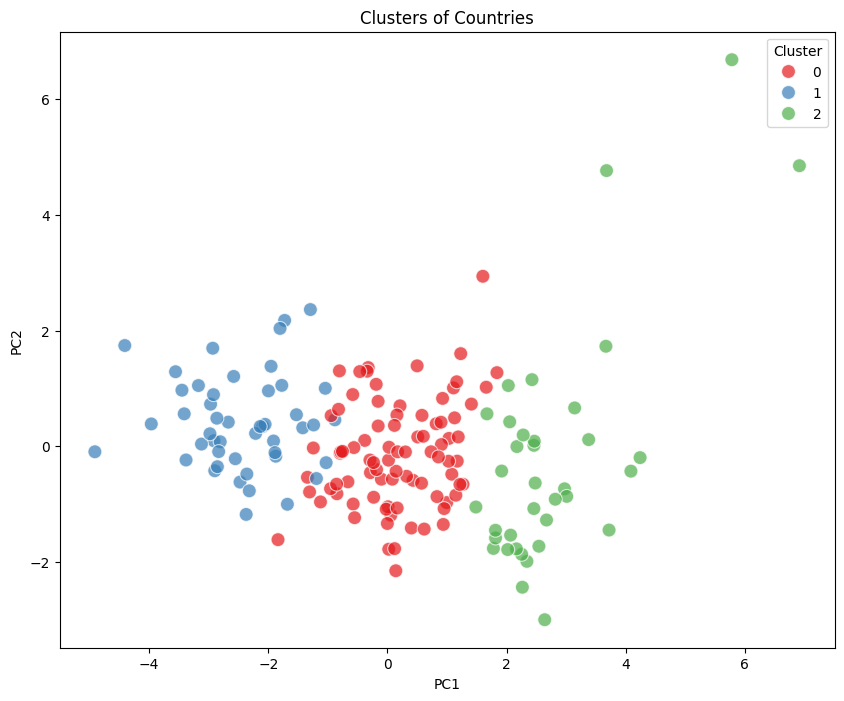

In [5]:
from sklearn.decomposition import PCA

# Giảm số chiều dữ liệu xuống 2 chiều bằng PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Thêm nhãn cụm vào DataFrame
principal_df['Cluster'] = clusters

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette='Set1', s=100, alpha=0.7)
plt.title('Clusters of Countries')
plt.show()